ML LAB 03
22k-4042

In [ ]:
# Q1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('DataTraining.csv')
test_data = pd.read_csv('DataTest.csv')

X_train = train_data[['Humidity', 'Light', 'HumidityRatio']]
y_train = train_data['Occupancy']
X_test = test_data[['Humidity', 'Light', 'HumidityRatio']]
y_test = test_data['Occupancy']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = []
best_accuracy = 0
best_k = 1

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print("All Accuracies from 1 to 10")
for i in range(len(accuracies)):
    print(f'K={i+1} : {accuracies[i]:.5f}')
print(f"\nHighest accuracy: {best_accuracy:.5f} at K={best_k}")



All Accuracies from 1 to 10
K=1 : 0.95427
K=2 : 0.95683
K=3 : 0.95857
K=4 : 0.96103
K=5 : 0.96401
K=6 : 0.96647
K=7 : 0.97252
K=8 : 0.97119
K=9 : 0.97283
K=10 : 0.97221

Highest accuracy: 0.97283 at K=9


In [ ]:
# Q2
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chi-squared distance function
def chi_squared_distance(x, y):
    return np.sum((x - y)**2 / (x + y ))  

# k-NN classifier from scratch
def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = chi_squared_distance(test_point, train_point)
            distances.append((distance, y_train[i]))
        
        distances = sorted(distances)[:k]
        neighbor_labels = [label for _, label in distances]
        prediction = max(set(neighbor_labels), key=neighbor_labels.count)
        y_pred.append(prediction)
    
    return np.array(y_pred)

k = 5
y_pred = knn_classifier(X_train, y_train, X_test, k)
#ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
#CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",conf_matrix)


Accuracy: 1.0000
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Q3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cancer patient data sets.csv')  
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


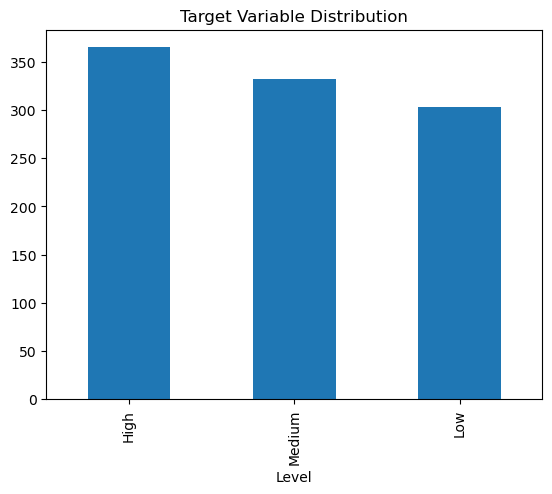

In [9]:

df['Level'].value_counts().plot(kind='bar', title='Target Variable Distribution')
plt.show()

In [11]:
label_counts = df['Level'].value_counts()
print(label_counts)

if label_counts.max() / label_counts.min() > 1.5:
    print("The dataset is NOT balanced.")
else:
    print("The dataset is balanced.")


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64
The dataset is balanced.


In [44]:
print(df.isnull().sum())

target = pd.get_dummies(df['Level'])
print(target)
datanew = pd.concat([df, target], axis=1)
print(datanew)

duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")
df.drop_duplicates(inplace=True)


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64
      High    Low  Medium
0    False   True   False
1    False  False    True
2     True  False   False
3     True  False   False
4     True  False   False
..     ...    ...     ...
995   True  False   False

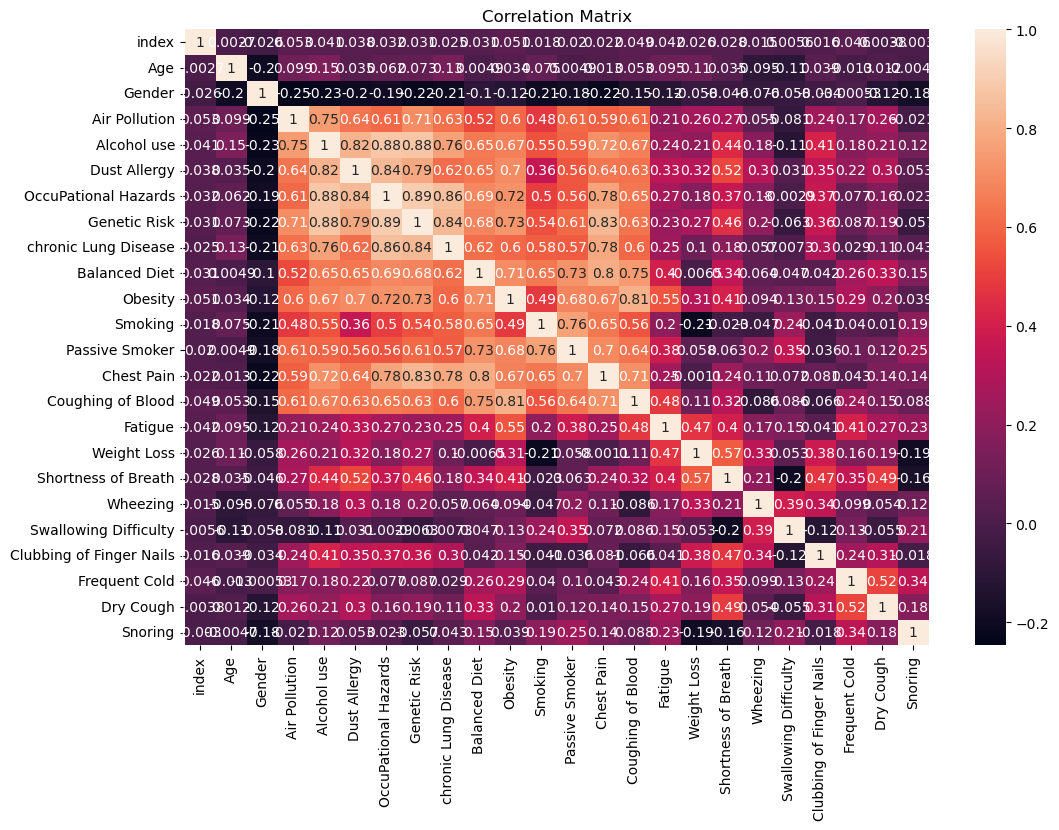

In [20]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [26]:
num_features = df.shape[1]
num_records = df.shape[0]
print(f"Total number of features: {num_features}")
print(f"Total number of records: {num_records}")

df_numeric = df.select_dtypes(include=[float, int])

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)  

    return col_corr

corr_features = correlation(df_numeric, 0.65)  
df_reduced = df_numeric.drop(corr_features, axis=1) 

# Print the results
print(f"Number of features to drop: {len(corr_features)}")
print(f"Reduced DataFrame shape: {df_reduced.shape}")


Total number of features: 26
Total number of records: 1000
Number of features to drop: 10
Reduced DataFrame shape: (1000, 14)


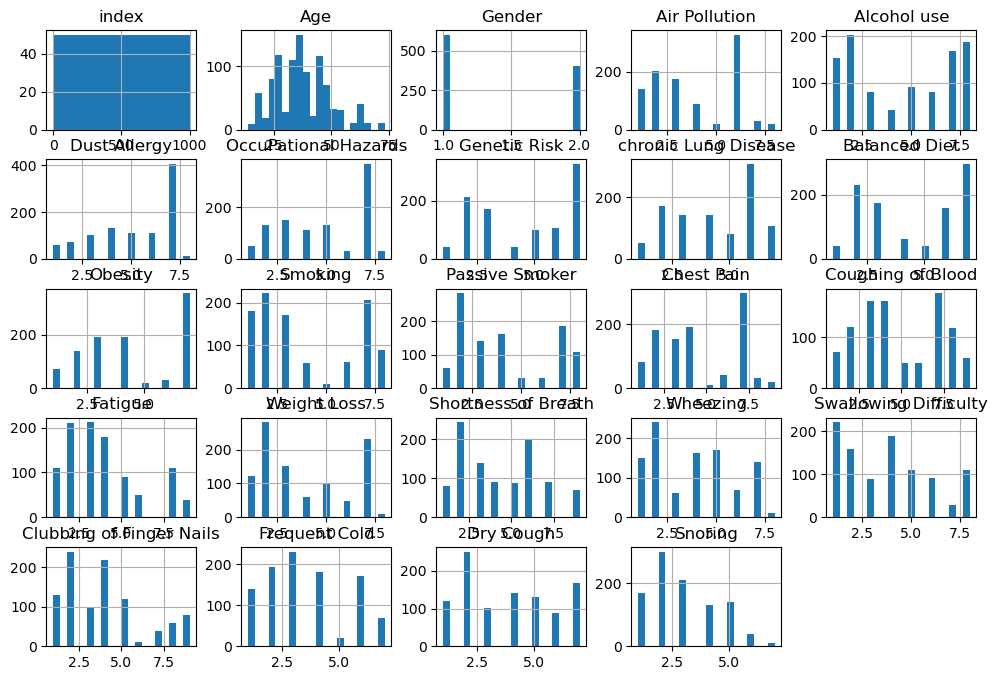

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

In [56]:
X = pd.get_dummies(df.drop('Level', axis=1), drop_first=True)

y = df['Level']  # Target variable

# Apply StandardScaler to the entire encoded DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)



knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Training accuracy: 1.0000
Validation accuracy: 1.0000
Test accuracy: 1.0000


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    val_accuracy = accuracy_score(y_val, knn.predict(X_val))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    
    results[metric] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    }
for metric, scores in results.items():
    print(f"Metric: {metric}")
    print(f"Training accuracy: {scores['train_accuracy']:.4f}")
    print(f"Validation accuracy: {scores['val_accuracy']:.4f}")
    print(f"Test accuracy: {scores['test_accuracy']:.4f}\n")


Metric: euclidean
Training accuracy: 1.0000
Validation accuracy: 1.0000
Test accuracy: 1.0000

Metric: manhattan
Training accuracy: 1.0000
Validation accuracy: 1.0000
Test accuracy: 1.0000

Metric: chebyshev
Training accuracy: 0.4339
Validation accuracy: 0.3458
Test accuracy: 0.2900

Metric: minkowski
Training accuracy: 1.0000
Validation accuracy: 1.0000
Test accuracy: 1.0000



In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

wine_data = load_wine()
X = wine_data.data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_knn(algorithm):
    knn = KNeighborsClassifier(algorithm=algorithm)
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    
    return train_accuracy, test_accuracy, elapsed_time

algorithms = ['auto', 'kd_tree', 'brute']
results = {}

for algo in algorithms:
    train_acc, test_acc, elapsed_time = evaluate_knn(algo)
    results[algo] = {'train_accuracy': train_acc, 'test_accuracy': test_acc, 'time': elapsed_time}

for algo, metrics in results.items():
    print(f"Algorithm: {algo}")
    print(f"Training Accuracy: {metrics['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"Time Taken: {metrics['time']:.6f} seconds")
    print("-" * 40)


Algorithm: auto
Training Accuracy: 0.9859
Testing Accuracy: 0.9444
Time Taken: 0.037517 seconds
----------------------------------------
Algorithm: kd_tree
Training Accuracy: 0.9859
Testing Accuracy: 0.9444
Time Taken: 0.023910 seconds
----------------------------------------
Algorithm: brute
Training Accuracy: 0.9859
Testing Accuracy: 0.9444
Time Taken: 0.294861 seconds
----------------------------------------
